####Edsigh Ed-Tech is a company with the primary goal to make education accessible and affordable to anyone with an internet connection. Teachers create and publish their courses on the platform, and students can enroll based on their interests and learning goals. 

PROBLEM OVERVIEW

The Director of Edsigh Ed-Tech contacted my team of Data Scientists because they are interested in leveraging the power of their data to gain insights into the business and improve their efficiency.

In analyzing this data we will seek to understand the performance of each course offered by their establishment and uncover where potential opportunities to increase business revenue lie


In [1]:
#Data Analysis

import pandas as pd
import numpy as np

#Data Visualization

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")


In [56]:
#Load data file 
df = pd.read_csv(R"C:\Users\Ezinne Osaji\Downloads\EdSigh Ed-Tech.csv")
df.head()

,Course_ID,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type
0,49798,65576,Bitcoin or How I Learned to Stop Worrying and ...,0,936,24,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance,4/20/2013,Free
1,48841,56659,Accounting in 60 Minutes - A Brief Introduction,0,4397,16,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance,4/7/2013,Free
2,133536,50855,Stock Market Investing for Beginners,0,2698,15,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance,12/25/2013,Free
3,151668,29167,Introduction to Financial Modeling,0,1463,8,All Levels,0.18,1.5,2014-05-27T16:22:16Z,Business Finance,5/27/2014,Free
4,648826,24481,The Complete Financial Analyst Course 2017,195,2347,174,All Levels,0.37,10.0,2016-01-21T01:38:48Z,Business Finance,1/21/2016,Paid


In [3]:
# Data Varification- Data type, number of features and rows, missing data etc
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course_ID            3676 non-null   int64  
 1   Num_Subscribers      3676 non-null   int64  
 2   Course_Title         3676 non-null   object 
 3   Price                3676 non-null   int64  
 4   Num_Review           3676 non-null   int64  
 5   Num_Lectures         3676 non-null   int64  
 6   Level                3676 non-null   object 
 7   Rating               3676 non-null   float64
 8   Content_Duration     3676 non-null   float64
 9   Published_Timestamp  3676 non-null   object 
 10  Subject              3676 non-null   object 
 11  Date_Published       3676 non-null   object 
 12  Course_Type          3676 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 373.5+ KB


In [4]:
# Statistical Analysis of the data
df.describe()

,Course_ID,Num_Subscribers,Price,Num_Review,Num_Lectures,Rating,Content_Duration
count,3.676000e+03,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000
mean,6.757535e+05,3199.260881,66.115343,156.309848,40.129761,0.610868,4.096137
std,3.431304e+05,9486.582966,61.056073,935.674518,50.398507,0.334287,6.054948
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.074740e+05,112.000000,20.000000,4.000000,15.000000,0.280000,1.000000
50%,6.876920e+05,912.500000,45.000000,18.000000,25.000000,0.760000,2.000000
75%,9.608140e+05,2558.000000,95.000000,67.000000,46.000000,0.930000,4.500000
max,1.282064e+06,268923.000000,200.000000,27445.000000,779.000000,1.000000,78.500000


In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3671    False
3672    False
3673    False
3674    False
3675    False
Length: 3676, dtype: bool

In [6]:
#check for missing value
print(df.isnull(). sum())

Course_ID              0
Num_Subscribers        0
Course_Title           0
Price                  0
Num_Review             0
Num_Lectures           0
Level                  0
Rating                 0
Content_Duration       0
Published_Timestamp    0
Subject                0
Date_Published         0
Course_Type            0
dtype: int64


In [57]:
#Exploratory Analysis and Data cleaning
# Separating the Day, month and year Published to different columns
df["Date_Published"]=pd.to_datetime(df["Date_Published"])
#df["month"]=df["date_of_Order"]".dt.month"
df["Day"]=df["Date_Published"].dt.day
df["Month"]=df["Date_Published"].dt.month
df["Year"]=df["Date_Published"].dt.year
df["Month_Name"]=df["Date_Published"].dt.month_name()
df.head(1)


,Course_ID,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type,Day,Month,Year,Month_Name
0,49798,65576,Bitcoin or How I Learned to Stop Worrying and ...,0,936,24,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance,2013-04-20,Free,20,4,2013,April


In [58]:
from datetime import datetime
#Separating time from date on the "Published_Timestamped Column"
df["Published_Timestamp"]=pd.to_datetime(df["Published_Timestamp"])
df["Date"]=df["Published_Timestamp"].dt.date
df["Timestamp"]=df["Published_Timestamp"].dt.time
df.head(1)

,Course_ID,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type,Day,Month,Year,Month_Name,Date,Timestamp
0,49798,65576,Bitcoin or How I Learned to Stop Worrying and ...,0,936,24,All Levels,0.56,8.0,2013-04-20 02:25:22+00:00,Business Finance,2013-04-20,Free,20,4,2013,April,2013-04-20,02:25:22


In [3]:

#Univariate Analysis- looking at each column to understand the data
df.columns

Index(['Course_ID', 'Num_Subscribers', 'Course_Title', 'Price', 'Num_Review',
       'Num_Lectures', 'Level', 'Rating', 'Content_Duration',
       'Published_Timestamp', 'Subject', 'Date_Published', 'Course_Type'],
      dtype='object')

<AxesSubplot:xlabel='Price'>

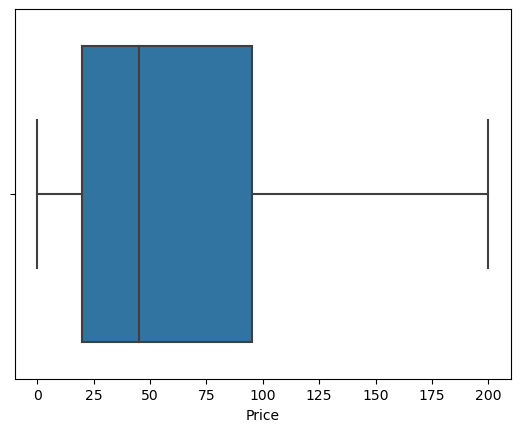

In [4]:
#Check for Outliners
# Insight on price
sns.boxplot(x=df["Price"])

This indicates the course prices ranges between USD 0-200.With most course price averaging USD 45

<AxesSubplot:xlabel='Content_Duration'>

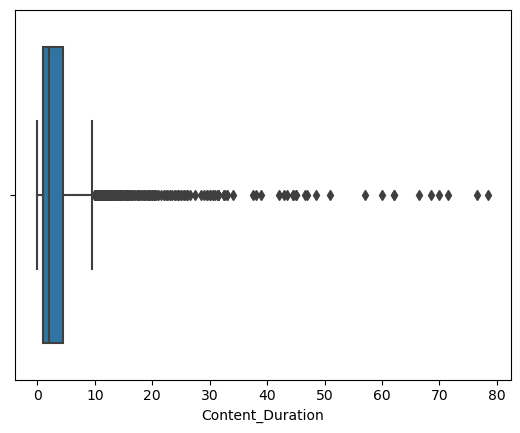

In [8]:
# insight on the duration of the Course content
sns.boxplot(x="Content_Duration",data=df)

In [ ]:
#The indicates that more of the contents are about 1-5hours.
#However, there are outliera that indicates that it could be as long as 80hrs.

<AxesSubplot:xlabel='Num_Lectures'>

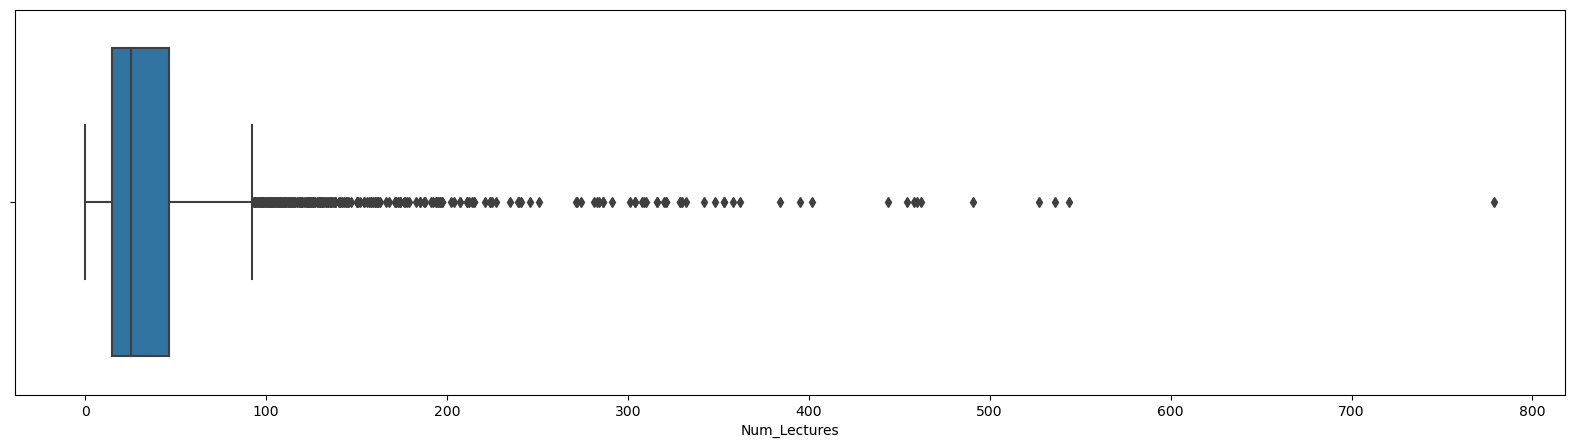

In [9]:
#investigating the Number of Lectures
plt.figure(figsize=(20,5))
sns.boxplot(x="Num_Lectures",data=df)


#This indicates numbers of lectures are mostly within 50 lectures per course. However, there are alot of outliners that shows the lectures can be longer to about 550 for course

<AxesSubplot:xlabel='Num_Subscribers'>

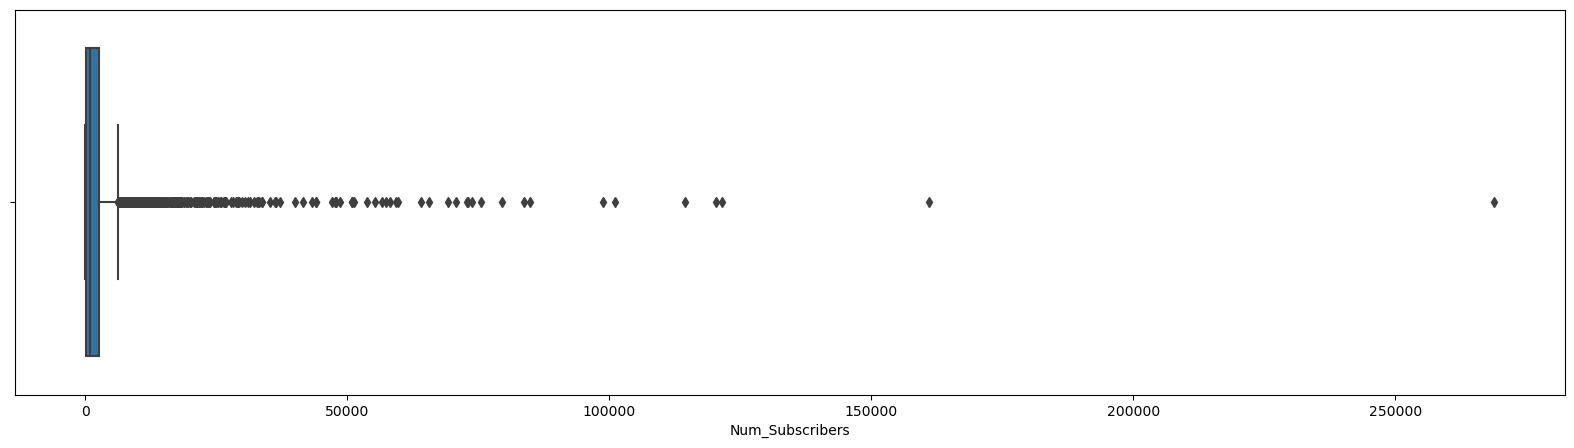

In [10]:
#investigating the Number of Subscribers
#plt.figure(figsize=(20,5))
sns.boxplot(x="Num_Subscribers",data=df)

#This indicates that the number of subscribers  are mostly within 0-3200.
#The outliers shows an occational increase to about 300000 

<AxesSubplot:xlabel='Num_Review'>

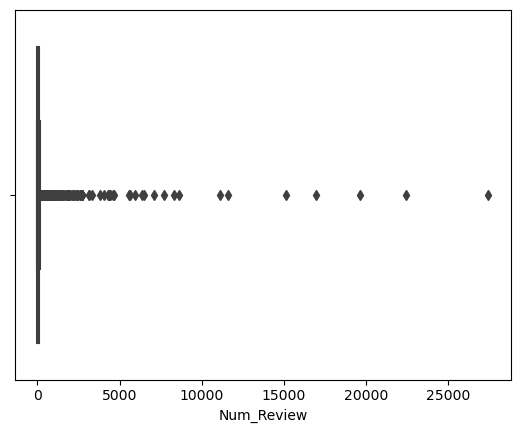

In [11]:
#Investigating the Number of Reviews
sns.boxplot(x=df["Num_Review"])

#This indicated very few reviews on the courses because most of the data are represented by outliers

<AxesSubplot:xlabel='Rating'>

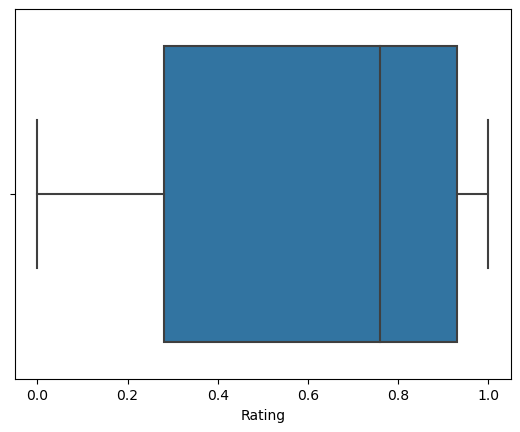

In [12]:
Investigationg the Ratings of the Course
sns.boxplot(x="Rating",data=df)


In [ ]:
 #This indicates that ratings are between 0-1 with most of the courses rated between 0.3-0.9

<AxesSubplot:xlabel='Price', ylabel='Subject'>

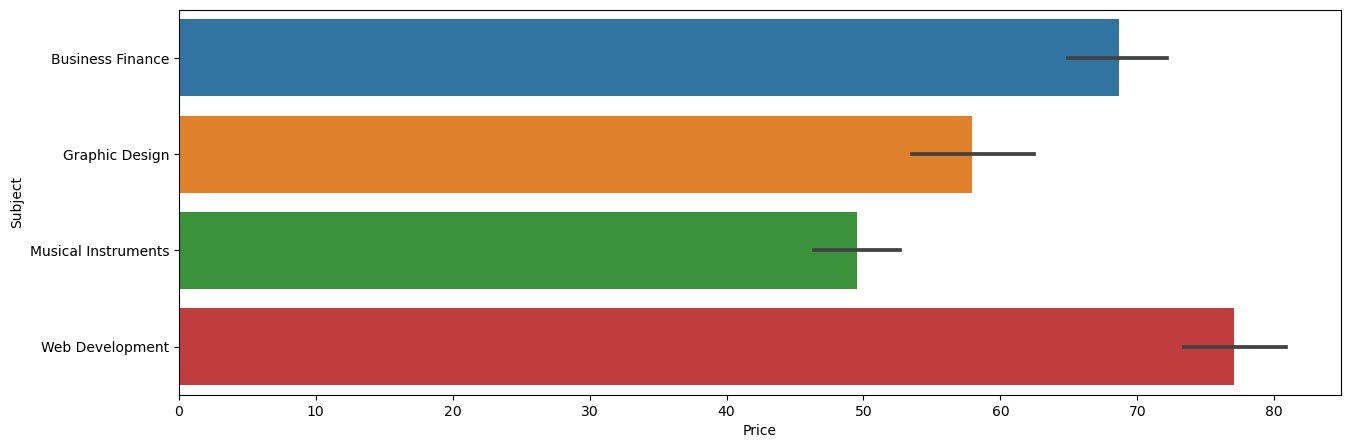

In [13]:
#Bivariate Analysis
#Investigating the Price by Subject
plt.figure(figsize=(15,5))
sns.barplot(x="Price",y="Subject", data=df)


In [ ]:
# This shows that the price by subject is highest in Web Development compared to the other three.

<Figure size 1000x1500 with 0 Axes>

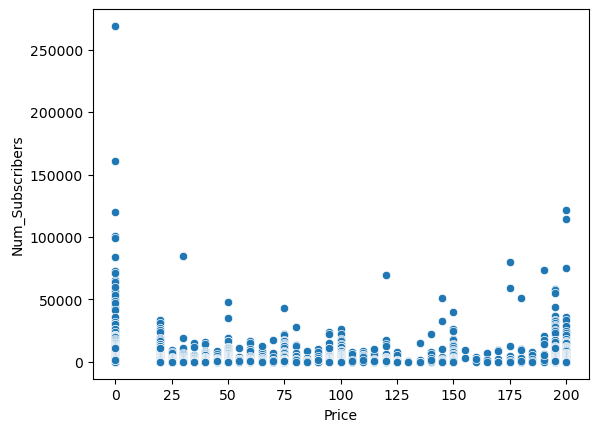

<Figure size 1000x1500 with 0 Axes>

In [14]:
#Investigating Price by Number of subscribers
sns.scatterplot(x="Price",y="Num_Subscribers", data=df)
plt.figure(figsize=(10,15))


#This indicates that the number of subscibers by price is very low

<AxesSubplot:xlabel='Num_Subscribers', ylabel='Subject'>

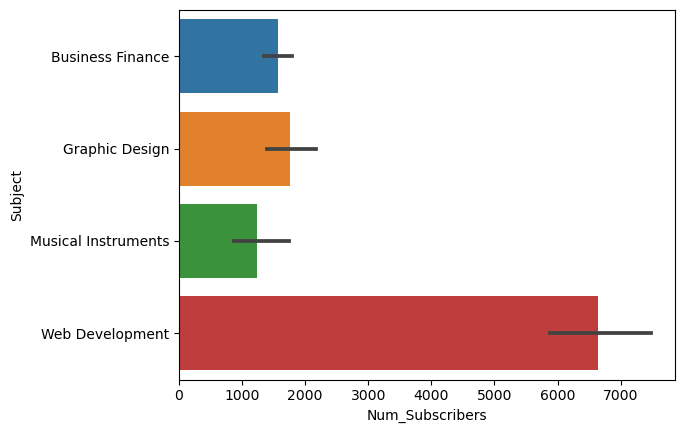

In [15]:
#investigation Numbers of Subscribers by Subjects
sns.barplot(x="Num_Subscribers", y="Subject",data=df)

#This indicates that Web Development is the most subscribed Subject

<AxesSubplot:xlabel='Rating', ylabel='Subject'>

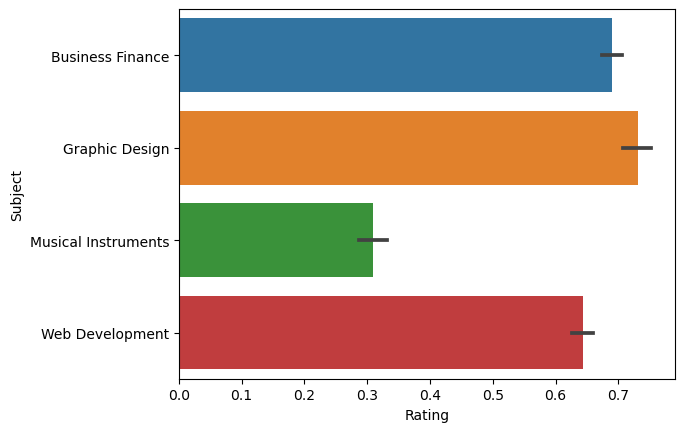

In [16]:
#investigating ratings by Subjects
sns.barplot(x="Rating", y="Subject",data=df)


In [ ]:
 #This indicates that Graphic Design has the highest reviews

<AxesSubplot:xlabel='Rating', ylabel='Course_Type'>

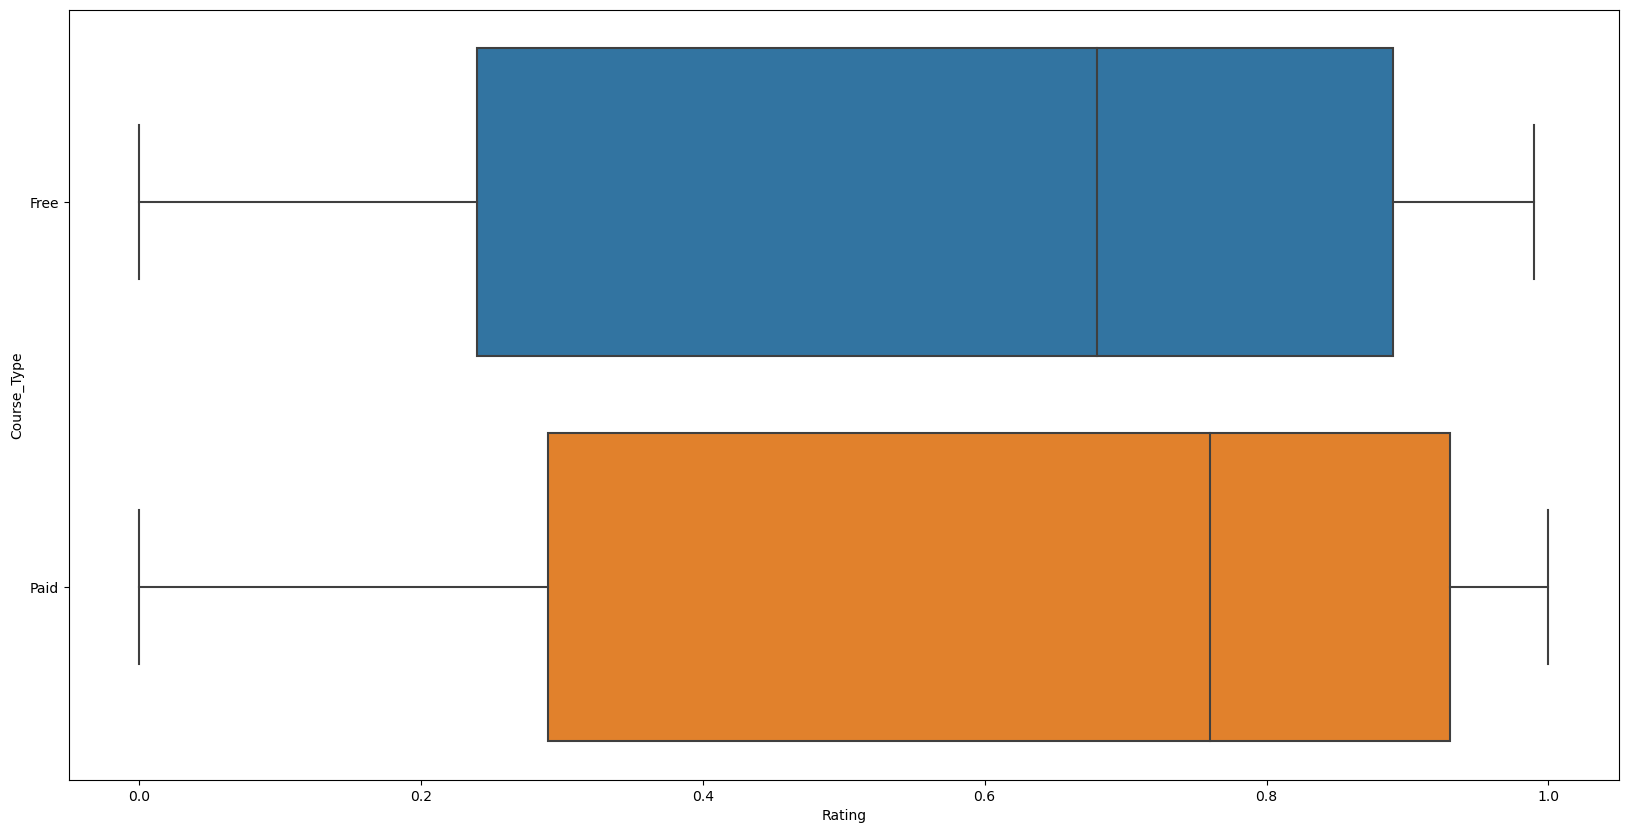

In [17]:
#Investing Ratings by Course Type
plt.figure(figsize=(20,10))
sns.boxplot(x="Rating", y="Course_Type",data=df)

In [ ]:
 #This indicates that the review for both were good. However, paid had more.

<AxesSubplot:xlabel='Num_Subscribers', ylabel='Course_Type'>

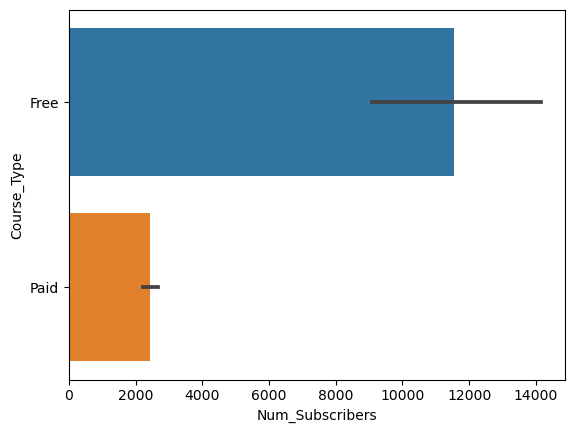

In [68]:
# Investing Numbers of subscribers by Course type
sns.barplot(x="Num_Subscribers", y="Course_Type",data=df)

In [ ]:
#The inducates that they are more learners subscribed to the free course type than the paid course type

<AxesSubplot:xlabel='Course_Type', ylabel='Num_Review'>

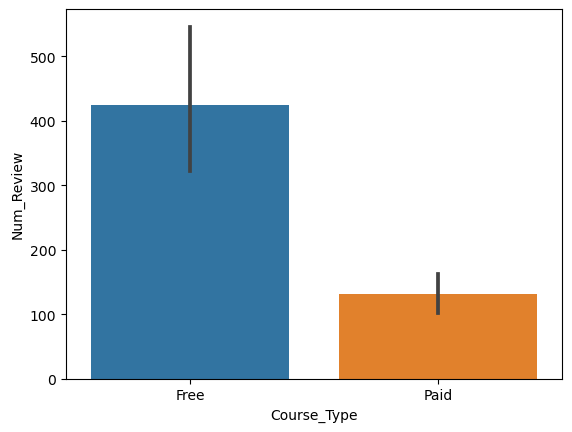

In [20]:
# Investigating Number of Reviews by Course type
sns.barplot(y="Num_Review", x="Course_Type",data=df)

In [ ]:
# When this was compared with the previous chart it show the number of reviews by Course type is way lower that the number of subscribers by course type

In [21]:
# Generating total revenue by multiplying number of subcribers by price
df["Revenue"] =df["Num_Subscribers"]*df["Price"]
df.head(1)


,Course_ID,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,...,month,year,month_name,Day,Month,Year,Month_Name,Date,Timestamp,Revenue
0,49798,65576,Bitcoin or How I Learned to Stop Worrying and ...,0,936,24,All Levels,0.56,8.0,2013-04-20 02:25:22+00:00,...,4,2013,April,20,4,2013,April,2013-04-20,02:25:22,0


<AxesSubplot:xlabel='Year', ylabel='Revenue'>

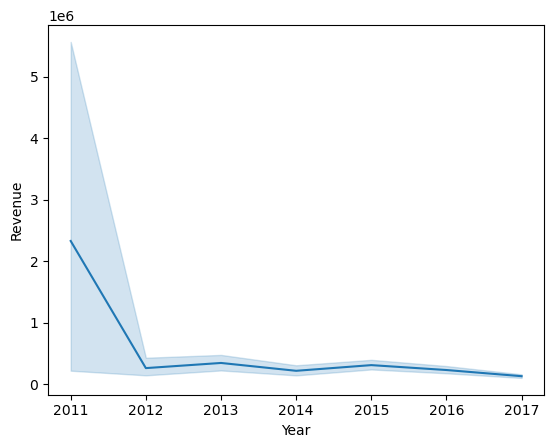

In [23]:
sns.lineplot(x="Year",y="Revenue", data=df)

In [ ]:
#The analysis shows that more revenue was generated in 2011.

In [51]:
#Analysing revenue over the years
ttl_rev=df.groupby("Year")["Revenue"].sum().reset_index
ttl_rev

<bound method Series.reset_index of Year
2011     11643420
2012     11773470
2013     69405820
2014    107162385
2015    314510395
2016    277694340
2017     92970175
Name: Revenue, dtype: int64>

In [29]:
# This shows the revenue was increasing over the years but there was a decrease in 2016 and a noticable drop in revenue in 2017

<bound method Series.reset_index of Year
2011     11643420
2012     11773470
2013     69405820
2014    107162385
2015    314510395
2016    277694340
2017     92970175
Name: Revenue, dtype: int64>

In [33]:
#Analysing Price over the years
p=df.groupby("Year")["Price"].sum().reset_index
p

<bound method Series.reset_index of Year
2011      310
2012     1835
2013    10785
2014    23800
2015    67830
2016    84260
2017    54220
Name: Price, dtype: int64>

In [ ]:
# This shows that over the years there have been a content increase in price


In [48]:
#Analysing subject by Revenue
average_revenue = df.groupby('Subject')['Revenue'].mean()
average_revenue

Subject
Business Finance       103891.952141
Graphic Design         127879.019934
Musical Instruments     78469.198529
Web Development        524590.577722
Name: Revenue, dtype: float64

In [ ]:
#Web development generated the most while Musical instruments the least

In [50]:
#Analyzing year of published and subject by Revenue
revenue_by_year_subject = df.groupby(['Year', 'Subject'])['Revenue'].sum()
revenue_by_year_subject

Year  Subject            
2011  Web Development         11643420
2012  Business Finance          190740
      Graphic Design           1329850
      Musical Instruments       766405
      Web Development          9486475
2013  Business Finance         7298950
      Graphic Design           3085300
      Musical Instruments      7479930
      Web Development         51541640
2014  Business Finance        35870820
      Graphic Design           8364490
      Musical Instruments     20899910
      Web Development         42027165
2015  Business Finance        38702015
      Graphic Design          23273795
      Musical Instruments     12363235
      Web Development        240171350
2016  Business Finance        30727750
      Graphic Design          23538210
      Musical Instruments      7458615
      Web Development        215969765
2017  Business Finance        10945040
      Graphic Design          17391525
      Musical Instruments      4390960
      Web Development         60242650

In [ ]:
# From the analysis is shows that there was a steady increase in revenue until in 2016 a decrease was noticed and a drop in revenue was recorded in 2017


In [72]:
#Analysing Course Title by Year of Published and Subjects.
course_counts_by_year_subject = df.groupby(['Year', 'Subject'])['Course_Title'].count()

course_counts_by_year_subject 




Year  Subject            
2011  Web Development          5
2012  Business Finance         6
      Graphic Design          10
      Musical Instruments     10
      Web Development         19
2013  Business Finance        84
      Graphic Design          23
      Musical Instruments     39
      Web Development         55
2014  Business Finance       192
      Graphic Design          65
      Musical Instruments    120
      Web Development        115
2015  Business Finance       339
      Graphic Design         168
      Musical Instruments    171
      Web Development        336
2016  Business Finance       347
      Graphic Design         181
      Musical Instruments    228
      Web Development        449
2017  Business Finance       223
      Graphic Design         155
      Musical Instruments    112
      Web Development        224
Name: Course_Title, dtype: int64

In [ ]:
# The analysis shows that in 2017 there was a drop in publication in all the subjects

RECOMMEDATIONS

1. From analyzing the data from the reviews by learners, it indicated that the number of reviews where not substantial to analyze the feedback from learners. So, we recommend that in between the course, the learner should be prompted for feedback before they can continue and prompted for another feedback when they are done with the course. The data generated from the reviews will enable the company to know the satisfaction level among learners and the performance of the courses.

2. Analysing price and number of subscribers, shows there was no correlation. The price is on a steady increase while the number of subscribers was not. I will recommend that the prices shouldn’t increase until the demand by subscribers increases.

3. Analyzing subjects by revenue, shows that there is demand for web development courses. I would recommend that the teachers are encouraged to create and publish more up-to-date lectures on that subject, so it continues to be in demand.

4. Comparing the number of course titles by year of published and subject, it was noted in 2017 there that the number of courses published was lower than the previous year and it affected the revenue drastically. I would recommend that more relevant publications should be made more frequently to meet learners’ demands.
